In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sld = pd\
    .read_csv(
        'relacionamento_clusters.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str
        }
    )\
    .filter(regex='^num_cpf_cnpj$|sld_')

In [3]:
df = pd\
    .read_csv(
        'cluster_personas.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str
        }
    )\
    .filter(regex='^(?!.*sld_).*$')\
    .merge(df_sld, on='num_cpf_cnpj', how='left')

In [4]:
df_sld = df.filter(regex='^Personalizar|^renda_mensal$|^idade|sld_')

In [6]:
sld_prods = df_sld\
    .drop(
        columns=[
            'idade',
            'renda_mensal'
        ]
    )\
    .groupby('Personalizar').sum()

<Axes: xlabel='idade', ylabel='Renda corrigida'>

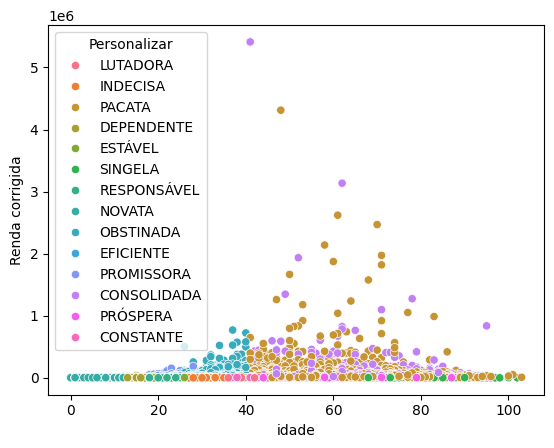

In [8]:
sns.scatterplot(
    data=df,
    x='idade',
    y='Renda corrigida',
    hue='Personalizar'
)

<Axes: ylabel='sld_cred_comercial'>

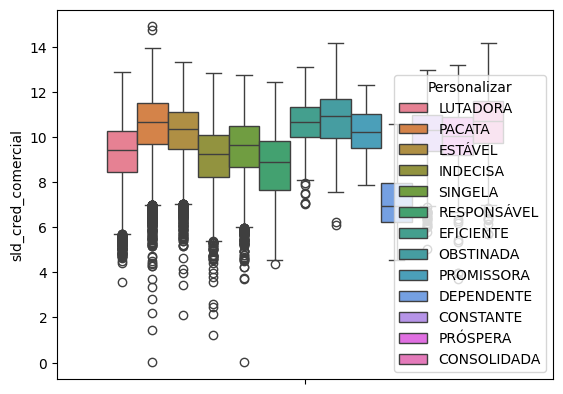

In [14]:
sns.boxplot(
    data=df\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='Personalizar'
)

In [ ]:
sns.boxplot(
    data=df\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='Personalizar'
)

<Axes: ylabel='investimento_total'>

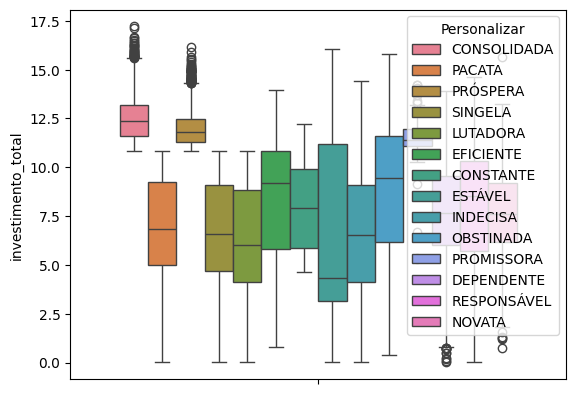

In [18]:
sns.boxplot(
    data=df\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),
    y='investimento_total',
    hue='Personalizar'
)